# Online Shopper Behavior Analysis and Prediction Using Machine Learning

### By: Birava Savalia

## Introduction
The dataset contains Online Shoppers Intention, and the part of project aims to analyze online shopper's behavioral patterns, derive valuable insights from important metrics like page values, exit rates, and bounce rates, and develop predictive models to determine whether a shopping session results in a purchase. The businesses can use this to boost conversion rates, enhance customer satisfaction, and optimize their websites.

**The Dataset contains 12,330 records and 18 features.**

## Library Import

In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Introduction to Data

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

### 18 Features
1. Administrative: It is the number of administrative pages that the user visited.
2. Administrative_Duration:Its is the amount of time spent for administrative  page by a users.
3. Informational: It is the number of informational pages that the user visited
4. Informational_Duration: It is the amount of time spent for informational pages by a user.
5. ProductRelat: It is the number of product related pages that the user visited.
6. ProductRelated_Duration: It is the amount of time spent for product related pages by a user.
7. BounceRates: The percentage of visitors who to entered the page and exit without trigger.
8. ExitRates: The percentage of pageviews by the user on the website amd that has ended.
9. PageValues: The average value of the page by the value of the target page in order to complete the eCommerce transaction.
10. SpecialDay: This value represents the closeness of the browsing date to special days or holidays.
11. Month: it is the month when pageview occurred, in string form.
12. OperatingSystems: It is an integer value represents the operating system of the user.
13. Browser: An integer value representing the browser that the user used.
14. Region: An integer value representing the region where the user is located.
15. TrafficType: An integer value representing the user categorization.
16. VisitorType: A string represents either New Visitor or Returning Visitor or Other.
17. Weekend: A boolean representing if the session was on a weekend.
18. Revenue: A boolean representing if the user completed the purchase.

## Performing basic visual analysis

#### Step 1: Load the Data

In [10]:
# Load the dataset
data = pd.read_csv("online_shoppers_intention.csv")

print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   


***There are 12330 observations in this dataset with 18 features.***

***Now, I will bring the data type of the features.***

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [13]:
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [14]:
print(data.describe)

<bound method NDFrame.describe of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0        

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


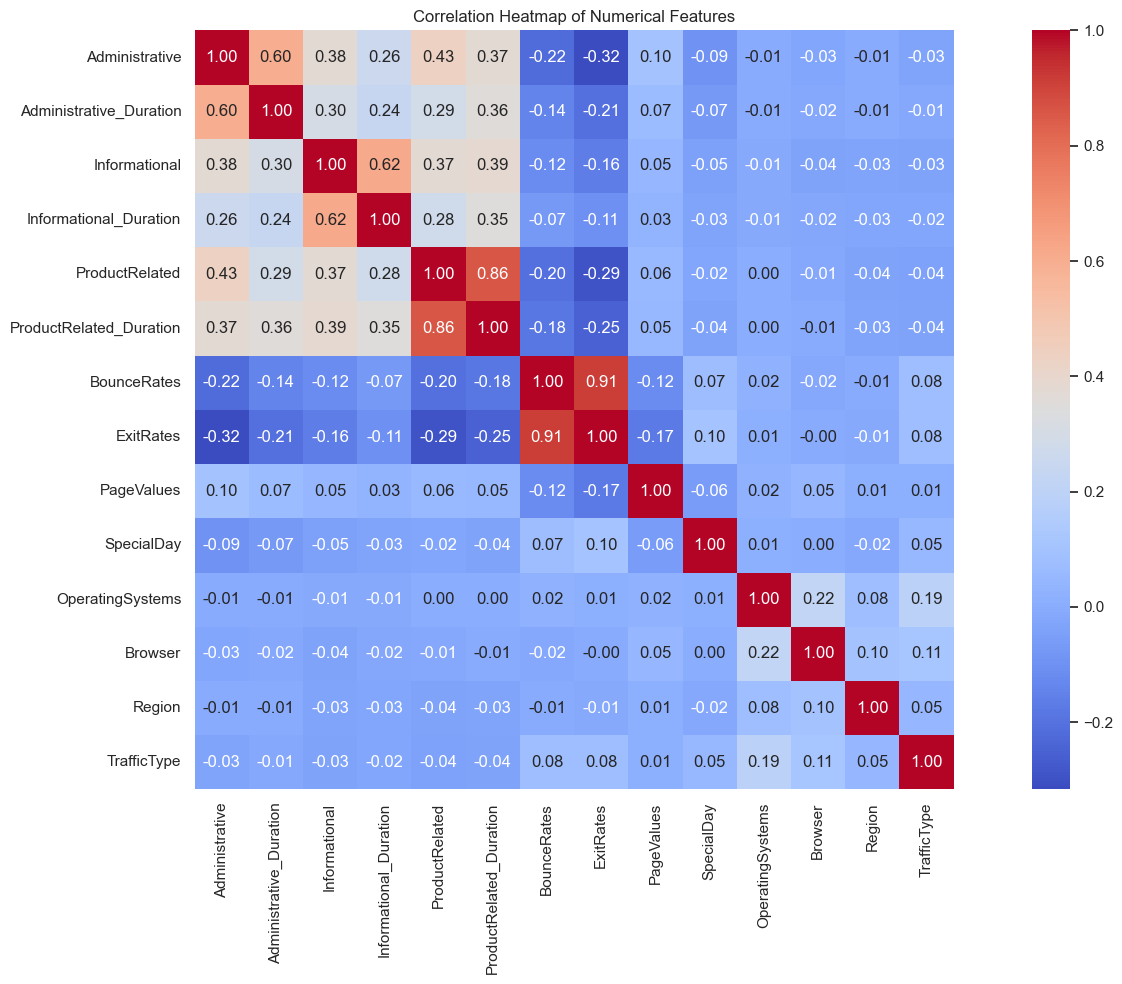

In [16]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## Preprocessing

In [18]:
# Encode categorical features - Month and Visitor Type

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,False,False,True,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,True


##### The chart below will provide Revenue by Month. This is will be just for studying something extra.

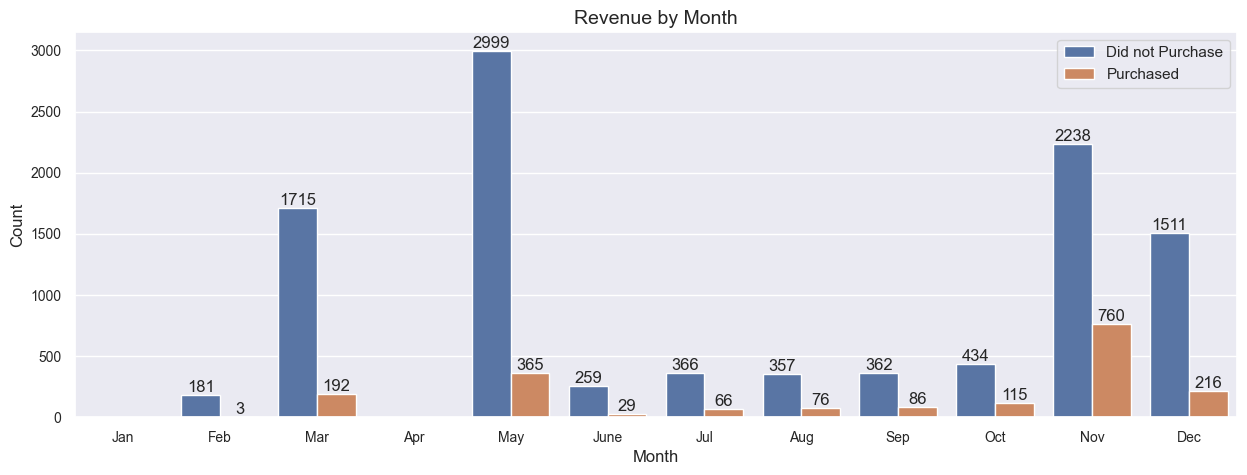

In [20]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Month", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x = 'Month', data = data, hue = 'Revenue', order = orderlist)
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

***Here I am trying to see which month has the most revenue accross the year. This would help me understand and process the data to see how the data is scatttered.***
From this graph, I have learned that January and April doesn't have any revenue. However, May, November, Febrauary, and December are having more revenues compare to other months.

In [22]:
data.Revenue.value_counts()

revenue_ratio = data.Revenue.value_counts(normalize=True)
revenue_ratio

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

## Modelling
* Predictive models that will be used are Logistic Regression,and Hyper Parameter Random Forest.
* Hyperparameter Tuning for the model with the best performance to try to improve its performance further.
* Train and evaluate models. 
* Evaluate with Cross Validation.

## Linear Regression Modelling (Algorithm #1)

***Now I'm going to start Linear Regression. This model will help me understand best alpha, interations and accuracy***

In [25]:
# this code block will get the average duration for Administrative, INformational and Product related pages
for feature in ["Administrative", "Informational", "ProductRelated"]:
    duration_feature = f"{feature}_Duration"
    new_attribute = f"{feature}_Average_Duration"
    
    data[new_attribute] = data[duration_feature] / data[feature]

# DataFrame
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative_Average_Duration,Informational_Average_Duration,ProductRelated_Average_Duration
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,NaN,NaN,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,NaN,NaN,32.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,NaN,NaN,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,NaN,NaN,1.333333
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,NaN,NaN,62.750000


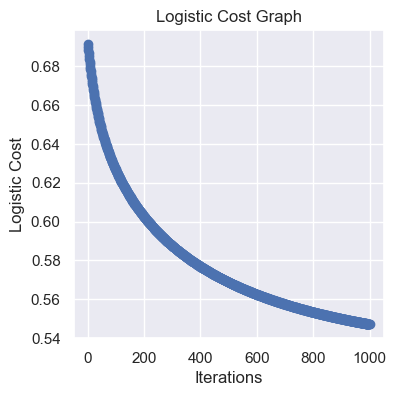

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
        'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
        'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region',
        'TrafficType', 'Weekend']]
y = data['Revenue']

# Test Data = 20% and Train Data = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Calculating logistic cost
def calculate_logistic_cost(X, y, theta):
    m = len(y)
    h = 1 / (1 + np.exp(-X.dot(theta)))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Initializing parameters with below code block
theta = np.zeros(X_train_scaled.shape[1])
iterations = 1000
alpha = 0.033

# Storing costs during training with below code block
cost_history = []

# Performing gradient descent with below code block
for iteration in range(iterations):
    # Calculating the predicted probabilities with below code block
    h = 1 / (1 + np.exp(-X_train_scaled.dot(theta)))
    
    # Updating parameters using gradient descent with below code block
    gradient = X_train_scaled.T.dot(h - y_train) / len(y_train)
    theta -= alpha * gradient
       
    cost = calculate_logistic_cost(X_train_scaled, y_train, theta)
    cost_history.append(cost)

plt.figure(figsize=(4, 4))
plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Logistic Cost')
plt.title('Logistic Cost Graph')
plt.show()

In [27]:
# Impleneting logistic Regression Gradient Descent with below code block
def logistic_regression_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    X = np.c_[np.ones(X.shape[0]), X]
    
    for _ in range(iterations):
        h = 1 / (1 + np.exp(-X.dot(theta)))
        gradient = X.T.dot(h - y) / m
        theta -= alpha * gradient
    
    return theta

# Making predictions with below code block
def predict(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
    return np.round(1 / (1 + np.exp(-X.dot(theta))))

# Initializing parameters with below code block
theta = np.zeros(X_train_scaled.shape[1] + 1)  # Additional parameter for bias
alpha_values = [0.001, 0.01, 0.33, 0.5, 1]
iterations_values = [100, 500, 1000, 2000, 3000]

# Performing grid search with below code block
best_accuracy = 0
best_alpha = 0
best_iterations = 0

for alpha in alpha_values:
    for iterations in iterations_values:
        # Performing logistic regression
        theta_optimized = logistic_regression_gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)
        
        # Test data set predictions
        y_pred = predict(X_test_scaled, theta_optimized)
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Updating the best hyperparameters if the better accuracy with below code block
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_alpha = alpha
            best_iterations = iterations

print("Best Alpha:", best_alpha)
print("Best Iterations:", best_iterations)

# Best hyperparameters to train the model with below code block
theta_optimal = logistic_regression_gradient_descent(X_train_scaled, y_train, theta, best_alpha, best_iterations)

# Predictions on the test set using the optimized model with below code block
y_pred = predict(X_test_scaled, theta_optimal)

#Evaluating the model with below code block
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Finally printing the results with below code block
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Best Alpha: 0.33
Best Iterations: 500
Accuracy: 0.8698296836982968
Confusion Matrix:
[[2006   49]
 [ 272  139]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2055
        True       0.74      0.34      0.46       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



## Random Forest Technique (Algorithm #2)

***Now I'm going to start Hyperparameter testing using Random Forest model. This model will help me understand the best performance with the up to date accuracy.***


In [29]:
# encoded features to dataset and drop non-encoded variables with below code
data = pd.concat([data, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Administrative                   12330 non-null  int64  
 1   Administrative_Duration          12330 non-null  float64
 2   Informational                    12330 non-null  int64  
 3   Informational_Duration           12330 non-null  float64
 4   ProductRelated                   12330 non-null  int64  
 5   ProductRelated_Duration          12330 non-null  float64
 6   BounceRates                      12330 non-null  float64
 7   ExitRates                        12330 non-null  float64
 8   PageValues                       12330 non-null  float64
 9   SpecialDay                       12330 non-null  float64
 10  OperatingSystems                 12330 non-null  int64  
 11  Browser                          12330 non-null  int64  
 12  Region            

In [30]:
# Selected Target and Features
y = data['Revenue']
X = data.drop('Revenue', axis=1)

#Split the Dataset for train and test sets (30% and 70% respectively)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Scaling train set using Standard scaler with below code

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
9737,2.025734,0.542659,-0.392986,-0.240998,0.844270,0.575064,-0.400535,-0.817852,-0.312906,-0.305446,...,-0.190744,-0.149221,-0.431731,-0.612746,1.751396,-0.211634,-0.192045,-0.398736,-0.081535,0.409792
9209,0.207786,0.040763,-0.392986,-0.240998,-0.551759,-0.573241,-0.459708,-0.434062,-0.312906,-0.305446,...,-0.190744,-0.149221,-0.431731,-0.612746,-0.570973,-0.211634,-0.192045,2.507927,-0.081535,-2.440261
7925,2.934707,2.379376,1.136603,11.140182,4.677809,3.806438,-0.171095,-0.313855,-0.215327,-0.305446,...,5.242628,-0.149221,-0.431731,-0.612746,-0.570973,-0.211634,-0.192045,-0.398736,-0.081535,0.409792
6138,-0.701187,-0.453642,0.371808,-0.165810,0.489723,0.048251,-0.385472,-0.427451,-0.312906,-0.305446,...,-0.190744,-0.149221,-0.431731,-0.612746,-0.570973,-0.211634,5.207111,-0.398736,-0.081535,0.409792
6135,-0.398196,-0.413753,-0.392986,-0.240998,-0.352326,-0.493626,-0.459708,-0.287016,-0.312906,-0.305446,...,-0.190744,6.701461,-0.431731,-0.612746,-0.570973,-0.211634,-0.192045,-0.398736,-0.081535,0.409792



For Random Forest Classifier, Accuracy score is  0.9007839956745066
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3129
        True       0.74      0.55      0.63       570

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699

[[3019  110]
 [ 257  313]]

	Confusion Matrix for Random Forest


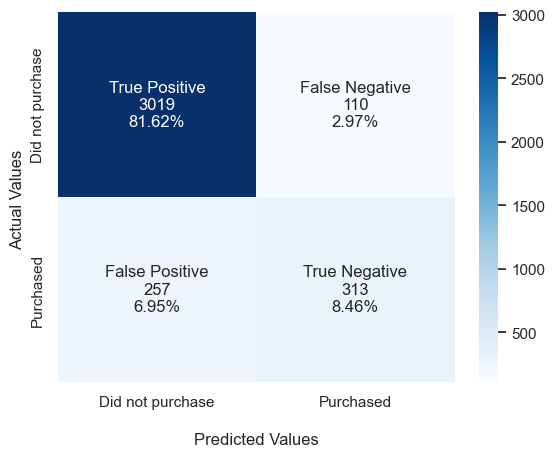

In [31]:
#Implementing RandomForest technique with below code
RF = RandomForestClassifier()

# confusion metrics
def c_matrix_plot(y_test,prediction):

    c_matrix = confusion_matrix(y_test,prediction)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

# confusion metrics columns
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Did not purchase', 'Purchased'])
    ax.yaxis.set_ticklabels(['Did not purchase', 'Purchased'])

    plt.show()
    
RF = RF.fit(X_train, y_train) 
RF_preds = RF.predict(X_test) 
print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test,RF_preds))
print(classification_report(y_test, RF_preds))
print(confusion_matrix(y_test, RF_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test, RF_preds)

In [32]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [33]:
#Implementing Cross Validation
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 250, stop = 5400, num = 8)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 150, num = 11)]
max_depth.append(None)
min_samples_split = [3, 6, 8]
min_samples_leaf = [1, 2, 6]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 33, 46, 59, 72, 85, 98, 111, 124, 137, 150, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 6],
 'min_samples_split': [3, 6, 8],
 'n_estimators': [250, 985, 1721, 2457, 3192, 3928, 4664, 5400]}


 ##### Please try loading below code with nbviewer.org.

In [35]:
# random grid to search the best hyperparameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = RF, 
                               param_distributions = random_grid, 
                               n_iter = 20,
                               cv = 3,
                               verbose = 2,
                               random_state = 42, 
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\birva\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
33 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\birva\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\birva\miniconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\birva\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\birva\miniconda3\Lib\site-pack

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 33, 46, 59, 72, 85,
                                                      98, 111, 124, 137, 150,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 6],
                                        'min_samples_split': [3, 6, 8],
                                        'n_estimators': [250, 985, 1721, 2457,
                                                         3192, 3928, 4664,
                                                         5400]},
                   random_state=42, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 4664,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 124,
 'bootstrap': True}

 #### Please try loading below code with nbviewer.org.

In [38]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=124, min_samples_split=6, n_estimators=4664)


For Random Forest Classifier, Accuracy score is  0.9018653690186537
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      3129
        True       0.76      0.53      0.63       570

    accuracy                           0.90      3699
   macro avg       0.84      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

[[3033   96]
 [ 267  303]]

	Confusion Matrix for Random Forest


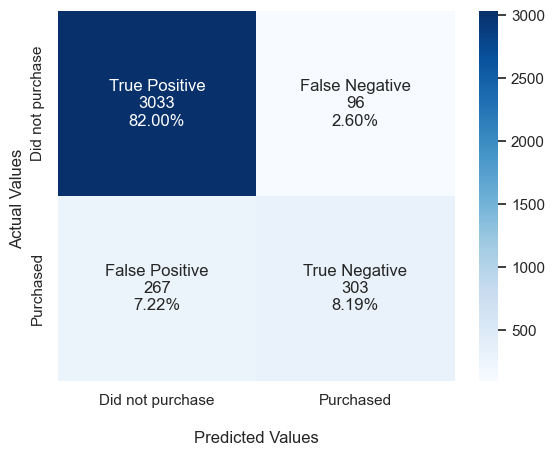

In [39]:
rf_random = RandomForestClassifier(n_estimators = 1600,
                                   max_depth = 10,
                                   min_samples_split = 2,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   bootstrap = True) 
rf_random.fit(X_train, y_train)
rf_random_preds = rf_random.predict(X_test)

print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test, rf_random_preds))
print(classification_report(y_test, rf_random_preds))
print(confusion_matrix(y_test, rf_random_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test, rf_random_preds)

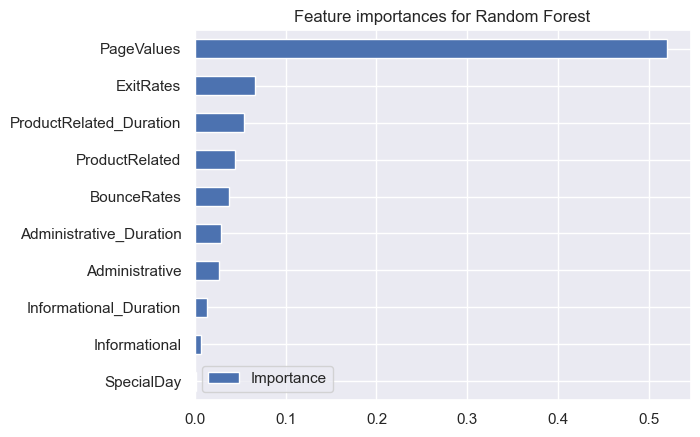

In [40]:
# Checking feature importances with below code
RF_importances = pd.DataFrame(data = rf_random.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Random Forest')
plt.show()

In [41]:
#getting the top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['SpecialDay', 'Informational', 'Informational_Duration',
       'Administrative', 'Administrative_Duration', 'BounceRates',
       'ProductRelated', 'ProductRelated_Duration', 'ExitRates',
       'PageValues'], dtype=object)

## Evaluating with Cross Validation

In [43]:
# Using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# preparing the cross-validation procedure
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [44]:
#creating function to train a model which includes cross validations and evaluates accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function - Expecting a model,'''
    
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs = -1)
    print('Accuracy:')
    print(accuracy_scores)
    print(model.__class__.__name__,'Mean Accuracy: %.3f' % (mean(accuracy_scores)))
    
    precision_scores = cross_val_score(model, X, y, scoring = 'precision', cv = cv, n_jobs = -1)
    print('\nPrecision:')
    print(precision_scores)
    print(model.__class__.__name__,'Mean Precision: %.3f' % (mean(precision_scores)))
    
    recall_scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1)
    print('\nRecall:')
    print(recall_scores)
    print(model.__class__.__name__,'Mean Recall: %.3f' % (mean(recall_scores)))
    
trainer_with_cv(rf_random, X, y)

Accuracy:
[0.90997567 0.91159773 0.89213301 0.90186537 0.90105434 0.91646391
 0.90592052 0.9026764  0.90429846 0.89618816]
RandomForestClassifier Mean Accuracy: 0.904

Precision:
[0.76119403 0.75833333 0.76153846 0.79104478 0.76744186 0.81679389
 0.73846154 0.78723404 0.8030303  0.79850746]
RandomForestClassifier Mean Precision: 0.778

Recall:
[0.55555556 0.53216374 0.49246231 0.54404145 0.51295337 0.57377049
 0.53631285 0.55445545 0.545      0.51442308]
RandomForestClassifier Mean Recall: 0.536


### Conclusions:
* I have learned two algorithms with the rela time data and they are Logistic Regression and Random Forest. 
* In this project, I have trained models to classify visitors to predict if they are likely make a purchase or not.
* The Random Forest had the best accuracy of 90%.
* The most important features includes the Page values, the Exit rate, Bounce rate, etc. as well as the duration spent on the pages.

### References/Acknowledgements:
1. Link: https://www.kaggle.com/code/habiburrahamanfahim/analyzing-the-purchase-intent-of-online-consumers/notebook#Logistic-Regressio
2. Link: https://github.com/TomaIjatomi/Online-shoppers-intention-prediction/blob/master/Online%20Shoppers%20Intention.ipynb
3. Link: https://www.kaggle.com/code/hongtaepn/online-shopping-intention-analytics-prediction
4. Link: https://ubc-mds.github.io/online-shoppers-purchasing-intention/intro.html
5. Link: https://github.com/tmcdonald92/Online-Shoppers-Purchasing-Intention******/